In [1]:
# Input:
path_x_train = '/content/X_train.npy'
path_y_train = '/content/y_train.npy'
path_x_val = '/content/X_val.npy'
path_y_val = '/content/y_val.npy'
path_scaler = '/content/time_scaler.pickle'
epochs=30
metrics = ['mae']
batch_size=500
model_name='forecaste_lstm.hdf5'
monitor='val_mae'
mode='min'
patience=5
test_score, val_score = 'mae', 'val_mae'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pickle
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Conv1D, MaxPooling1D, Flatten, ConvLSTM2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [4]:
# Load data (lag 3 steps)
X_train = np.load(open(path_x_train, 'rb'))
y_train = np.load(open(path_y_train, 'rb'))
X_val = np.load(open(path_x_val, 'rb'))
y_val = np.load(open(path_y_val, 'rb'))

In [5]:
print("X_train: ", X_train.shape, "| y_train: ", y_train.shape)
print("X_val: ", X_val.shape, "| y_val: ", y_val.shape)

X_train:  (4620, 3, 6) | y_train:  (4620, 1)
X_val:  (1067, 3, 6) | y_val:  (1067, 1)


In [32]:
# Vanilla LSTM architecture
def build_vanilla_lstm_model(X_train):
    model = Sequential()
    model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=opt, metrics=metrics)

    return model

In [7]:
# Stacked LSTM architecture
def build_stacked_lstm_model(X_train):
    model = Sequential()
    model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(16, activation='relu'))
    model.add(Dense(1))
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=opt, metrics=metrics)

    return model

In [8]:
# Set callbacks
def create_callbacks(model_name, monitor, mode, patience):
    # Early stopping
    es = EarlyStopping(
        monitor=monitor, mode=mode, verbose=0, patience=patience, restore_best_weights=True
    )

    # Checkpoint
    checkpoint = ModelCheckpoint(
        filepath=model_name,
        monitor=monitor,
        mode=mode,
        save_best_only=True
    )

    return es, checkpoint

In [9]:
# Fit model
def fit_model(model, es, checkpoint, X_train, y_train, X_val, y_val):
    model_history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[checkpoint, es],
        shuffle=False,
        verbose=2
    )
    return model, model_history

In [10]:
# Plot model history
def plot_history(model_history, test_score, val_score):
    # Visualize the CNN training history
    fig, ax = plt.subplots(1, 2, figsize=(6,2))

    # Accuracy
    ax[0].plot(model_history.history[test_score])
    ax[0].plot(model_history.history[val_score])
    ax[0].set_title(test_score)
    ax[0].set_ylabel(test_score)
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'val'], loc='upper left')

    # Loss
    ax[1].plot(model_history.history['loss'])
    ax[1].plot(model_history.history['val_loss'])
    ax[1].set_title('loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'val'], loc='upper left')
    plt.show()

# Vanilla LSTM

In [33]:
# Create callbacks
es, checkpoint = create_callbacks('forecaster_vanilla_lstm.hdf5', monitor, mode, patience)
# Build model architecture
model_vanilla_lstm = build_vanilla_lstm_model(X_train)
# Fit the model
model_vanilla_lstm, model_vanilla_lstm_history = fit_model(
    model_vanilla_lstm, es, checkpoint, X_train, y_train, X_val, y_val
)

Epoch 1/30
10/10 - 2s - loss: 0.7708 - mae: 0.6393 - val_loss: 1.0527 - val_mae: 0.7516 - 2s/epoch - 174ms/step
Epoch 2/30
10/10 - 0s - loss: 0.6497 - mae: 0.5660 - val_loss: 0.8978 - val_mae: 0.7024 - 122ms/epoch - 12ms/step
Epoch 3/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 - 0s - loss: 0.5952 - mae: 0.5361 - val_loss: 0.8884 - val_mae: 0.7077 - 105ms/epoch - 10ms/step
Epoch 4/30
10/10 - 0s - loss: 0.5678 - mae: 0.5276 - val_loss: 0.8600 - val_mae: 0.6994 - 105ms/epoch - 11ms/step
Epoch 5/30
10/10 - 0s - loss: 0.5426 - mae: 0.5186 - val_loss: 0.8096 - val_mae: 0.6771 - 173ms/epoch - 17ms/step
Epoch 6/30
10/10 - 0s - loss: 0.5187 - mae: 0.5073 - val_loss: 0.7687 - val_mae: 0.6569 - 181ms/epoch - 18ms/step
Epoch 7/30
10/10 - 0s - loss: 0.4936 - mae: 0.4933 - val_loss: 0.7285 - val_mae: 0.6365 - 170ms/epoch - 17ms/step
Epoch 8/30
10/10 - 0s - loss: 0.4641 - mae: 0.4769 - val_loss: 0.6813 - val_mae: 0.6134 - 179ms/epoch - 18ms/step
Epoch 9/30
10/10 - 0s - loss: 0.4288 - mae: 0.4577 - val_loss: 0.6269 - val_mae: 0.5855 - 188ms/epoch - 19ms/step
Epoch 10/30
10/10 - 0s - loss: 0.3882 - mae: 0.4344 - val_loss: 0.5697 - val_mae: 0.5516 - 176ms/epoch - 18ms/step
Epoch 11/30
10/10 - 0s - loss: 0.3472 - mae: 0.4092 - val_loss: 0.5239 - val_mae: 0.5183 - 160ms/e

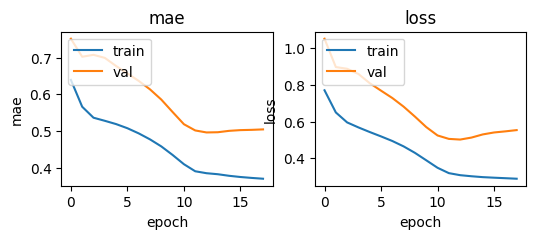

In [34]:
# Plot model history
plot_history(model_vanilla_lstm_history, test_score, val_score)

# Stacked LSTM

In [13]:
# Create callbacks
es, checkpoint = create_callbacks('forecaster_stacked_lstm.hdf5', monitor, mode, patience)
# Build model architecture
model_stacked_lstm = build_stacked_lstm_model(X_train)
# Fit the model
model_stacked_lstm, model_stacked_lstm_history = fit_model(
    model_stacked_lstm, es, checkpoint, X_train, y_train, X_val, y_val
)

Epoch 1/30
10/10 - 3s - loss: 0.9321 - mae: 0.7323 - val_loss: 1.6825 - val_mae: 0.9567 - 3s/epoch - 308ms/step
Epoch 2/30
10/10 - 0s - loss: 0.8471 - mae: 0.6910 - val_loss: 1.3452 - val_mae: 0.8590 - 172ms/epoch - 17ms/step
Epoch 3/30
10/10 - 0s - loss: 0.7638 - mae: 0.6467 - val_loss: 1.1875 - val_mae: 0.8052 - 148ms/epoch - 15ms/step
Epoch 4/30
10/10 - 0s - loss: 0.7110 - mae: 0.6056 - val_loss: 1.1225 - val_mae: 0.7746 - 153ms/epoch - 15ms/step
Epoch 5/30
10/10 - 0s - loss: 0.6905 - mae: 0.5858 - val_loss: 1.0833 - val_mae: 0.7602 - 174ms/epoch - 17ms/step
Epoch 6/30
10/10 - 0s - loss: 0.6637 - mae: 0.5818 - val_loss: 1.0375 - val_mae: 0.7481 - 158ms/epoch - 16ms/step
Epoch 7/30
10/10 - 0s - loss: 0.6299 - mae: 0.5695 - val_loss: 0.9651 - val_mae: 0.7225 - 158ms/epoch - 16ms/step
Epoch 8/30
10/10 - 0s - loss: 0.5845 - mae: 0.5476 - val_loss: 0.9053 - val_mae: 0.6942 - 156ms/epoch - 16ms/step
Epoch 9/30
10/10 - 0s - loss: 0.5182 - mae: 0.5189 - val_loss: 0.8754 - val_mae: 0.6741 - 

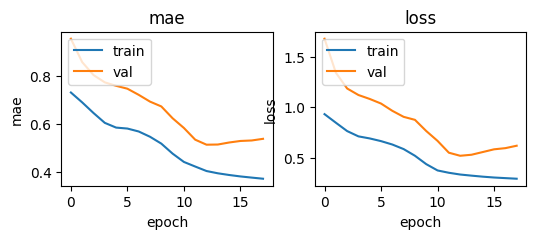

In [14]:
# Plot model history
plot_history(model_stacked_lstm_history, test_score, val_score)